<a href="https://colab.research.google.com/github/watanabe-gk/study_gpt/blob/main/%E3%82%B3%E3%82%B5%E3%82%A4%E3%83%B3%E9%A1%9E%E4%BC%BC%E5%BA%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# モジュールのインストール

https://fasttext.cc/docs/en/english-vectors.html

2017年版のWikipedia、UMBC ウェブベース コーパス、 statmt.org ニュースの データセット (16億トークン) で学習された 100 万単語のベクトルを利用します。

In [ ]:
#@title 学習済み埋め込みベクトルのダウンロード
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip
!git clone https://github.com/Michi-123/whiteGPT

--2024-11-28 04:48:16--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.25, 13.226.210.78, 13.226.210.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  99.2MB/s    in 6.4s    

2024-11-28 04:48:22 (101 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   
Cloning into 'whiteGPT'...
remote: Enumerating objects: 1255, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 1255 (delta 59), reused 58 (delta 29), pack-reused 1164 (from 1)
Receiving objects: 100% (1255/1255), 136.83 MiB | 17.03 MiB/s, done.
Re

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from whiteGPT import word2vec

In [ ]:
# @markdown ベクトルの読み込み
vec_file_path = '/content/wiki-news-300d-1M.vec' #@param{type:'string'}
vectors = word2vec.load_vectors(vec_file_path)

In [ ]:
# ベクトルの表示


<BarContainer object of 300 artists>

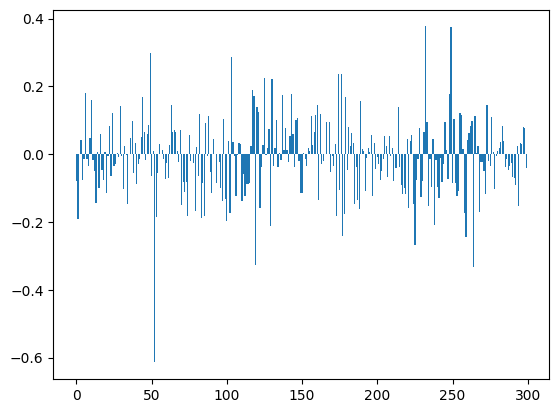

In [ ]:
# 埋め込みベクトルのグラフ
labels = np.arange(300)
plt.bar(labels,  vectors['paper'])

# コサイン類似度


$$
\text{cosine_similarity}(A,B)=
\frac{A⋅B}{||A||\space||B||}
​$$


In [ ]:
# @title コサイン類似度の計算
import numpy as np

def cosine_similarity(vec1, vec2):
    dot = np.dot(vec1, vec2)
    # Linear algebra（線形代数）ライブラリの利用
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    norm = norm1 * norm2

    similarity = dot / norm

    return similarity

In [ ]:
# 適当なテスト用のベクトルを作成
vector1 = np.array([0.1, 0.2, 0.3])
vector2 = np.array([-0.3, -0.2, -0.1])

# コサイン類似度の計算
similarity = cosine_similarity(vector1, vector2)
print("Cosine Similarity:", similarity)

Cosine Similarity: -0.7142857142857143


In [ ]:
vector1 = vectors['paper']
vector2 = vectors['banana']
cosine_similarity(vector1, vector2)

0.38695389573492

近いベクトルを抽出

In [ ]:
# 基準となるベクトルと他のベクトルとの類似度を調べます。
vector1 = vectors['travels']

similarities = []

for key, vector2 in vectors.items():
    similarity = cosine_similarity(vector1, vector2)

    # 類似度が0.6超のベクトルを収集
    if similarity > 0.6 :
        similarities.append([similarity, key])

In [ ]:
# 収集したベクトルの数
len(similarities)

11

In [ ]:
# 類似度の降順で並べ替え
similarities.sort(reverse=True)

In [ ]:
# 先頭n件の表示
similarities[:10]

[[0.9999999999999998, 'travels'],
 [0.7265254232306232, 'traveled'],
 [0.7124680136520343, 'traveling'],
 [0.706438410229365, 'travelled'],
 [0.688254091409487, 'travel'],
 [0.6668341446856703, 'travelling'],
 [0.6634190104185295, 'journeys'],
 [0.6481449594261749, 'journey'],
 [0.6096137938210074, 'trips'],
 [0.6067351872321227, 'encounters']]

# ベクトル空間の四則演算の例を確認します

王 - 男 + 女 = 女王？

In [ ]:
# king - man + woman
king = vectors['king']
queen = vectors['queen']
man = vectors['man']
woman = vectors['woman']
cosine_similarity(king - man + woman, queen)

0.7673766998589789

夏 - 暑い + 寒い = 冬？

In [ ]:
# 基準となるベクトル
hot = vectors['hot']
cold = vectors['cold']
summer = vectors['summer']
winter = vectors['winter']

In [ ]:
# hot と cold
cosine_similarity(hot, cold)

0.712784465178353

In [ ]:
# hot と summer
cosine_similarity(hot, summer)

0.4838471573685533

In [ ]:
# summer と winter
cosine_similarity(summer, winter)

0.8376738582256028

In [ ]:
# (summer - hot + cold)と winter
cosine_similarity(summer - hot + cold, winter)

0.7816870725903828

<BarContainer object of 300 artists>

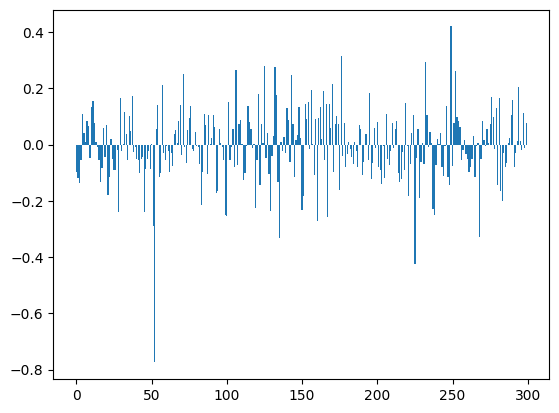

In [ ]:
# `hot`ベクトルとは
labels = np.arange(300)
plt.bar(labels, hot)

In [ ]:
#@title 特徴ベクトルの作成
def create_feature_vectors(vectors, keys):

    feature_vectors = np.zeros(300)

    for key in keys:
        feature_vectors += vectors[key]

    feature_vectors /= len(keys)

    return feature_vectors

In [ ]:
#@title 暑さの特徴ベクトルを見つける

# 暑い（熱い）単語
keys_hot = ['hot', 'boiling', 'beach', 'heat', 'August', 'burn', 'swimming']

# 寒い（冷たい）単語
keys_cold = ['cold', 'ice', 'winter', 'frozen', 'water', 'snow', 'coat', 'skiing']

# 特徴ベクトルの作成
feature_hot = create_feature_vectors(vectors, keys_hot)
feature_cold = create_feature_vectors(vectors, keys_cold)

In [ ]:
# (summer - 暑さの特徴 + 寒さの特徴)と winter
cosine_similarity(summer - feature_hot + feature_cold, winter)

0.8831522640795191

In [ ]:
# 温度の特徴ベクトル
temperature = feature_hot - feature_cold

In [ ]:
# 本来の暑さとの関係はない（直交ベクトル）
cosine_similarity(temperature , hot)

0.14435782506465708

<BarContainer object of 300 artists>

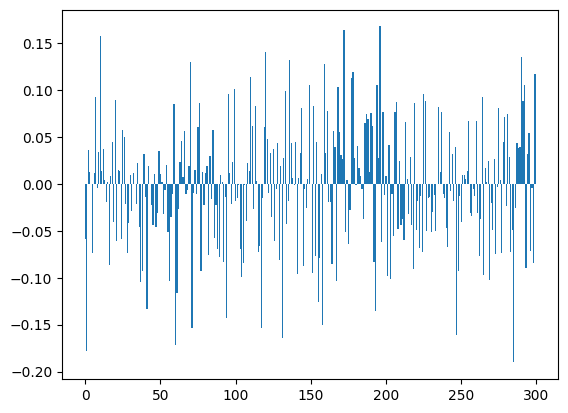

In [ ]:
# 温度の特徴ベクトルを可視化
labels = np.arange(300)
plt.bar(labels, temperature)

In [ ]:
# @title 練習
# king - man + woman = queen になるように、特徴ベクトルを見つけてみましょう

# 男性の特徴
keys_man = ['man']
# 女性の特徴
keys_woman = ['woman']

# 特徴ベクトルの作成
feature_man = create_feature_vectors(vectors, keys_man)
feature_woman = create_feature_vectors(vectors, keys_woman)

# コサイン類似度
cosine_similarity(king - feature_man + feature_woman, queen)

0.7673766998589789

In [ ]:
# @title king - man + woman の例
king = vectors['king']
queen = vectors['queen']

# 男性の特徴
keys_man = ['male','boy','father','brother','beard','prince']
feature_man = create_feature_vectors(vectors, keys_man)

# 女性の特徴
keys_woman = ['female','girl','mother','sister','hair','princess']
feature_woman = create_feature_vectors(vectors, keys_woman)

cosine_similarity(king - feature_man + feature_woman*1.0, queen)

# 同じキーを取り出せるか？

In [ ]:
# @title 類似する項目の検索
def search_similar_item(vectors, reference_vector):
    # 初期化
    max_similar_key = None # 最大の類似キー
    max_similarity = -float('inf')  # 最大の類似度
    similarity_list = {} # 類似度の一覧

    # 全てのベクトルに対して、reference_vectorとの類似度を算出します
    for i, key in enumerate(vectors):

        # コサイン類似度の算出
        similarity = cosine_similarity(reference_vector, vectors[key])

        if similarity > 0.6: # 閾値
            similarity_list[key] = similarity

        # 最大値の更新
        if max_similarity < similarity:
            max_similarity = similarity
            max_similar_key = key

    return max_similar_key, max_similarity, similarity_list

In [ ]:
-float('inf')  # 何を足してもマイナス

-inf

In [ ]:
# summer - feature_hot + feature_cold
reference_vector = summer - feature_hot + feature_cold
key, similarity, similarity_list = search_similar_item(vectors, reference_vector)

In [ ]:
key

'winter'

In [ ]:
# king - feature_man + feature_woman
reference_vector = king - feature_man + feature_woman
key, similarity, similarity_list = search_similar_item(vectors, reference_vector)

In [ ]:
key

'king'

In [ ]:
similarity_list

{'woman': 0.6528975536940479,
 'king': 0.8655095024381783,
 'royal': 0.6090123954390187,
 'kingdom': 0.6208546228107239,
 'lady': 0.6286187170018799,
 'queen': 0.7673766998589789,
 'prince': 0.6222133925566985,
 'kings': 0.69295470069991,
 'ruler': 0.6064773169620795,
 'monarch': 0.6955799884585835,
 'princess': 0.6909605180475173,
 'monarchs': 0.6011001135135446}

# 地名で検証

In [ ]:
tokyo = vectors['Tokyo']
france = vectors['France']
paris = vectors['Paris']
japan = vectors['Japan']

In [ ]:
# コサイン類似度
cosine_similarity(tokyo - japan + france, paris )

0.8581427034450735

In [ ]:
# tokyo - japan + france, paris
reference_vector = tokyo - japan + france
key, similarity, similarity_list = search_similar_item(vectors, reference_vector)

In [ ]:
key

'Paris'

In [ ]:
similarity

0.8581427034450735

In [ ]:
similarity_list

{'London': 0.6492047855513082,
 'France': 0.7769600992651912,
 'Paris': 0.8581427034450735,
 'Moscow': 0.6188102119469614,
 'Tokyo': 0.7074563706580035,
 'Madrid': 0.6197539955434832,
 'Brussels': 0.6365837658519494,
 'Lyon': 0.631753234405606,
 'Bordeaux': 0.6409008598843248,
 'Marseille': 0.6422051102056436,
 'Toulouse': 0.6626864245831817,
 'Strasbourg': 0.6166382004080776}